In [33]:
# Libraries

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [35]:
# The following is a summary of the below code:
# Overall, GridSearch and SFS did worse than initially tested models
# The PCA data was able to outperform the original data
# Predicting on PCs 1 and 3 produced the best results
# The Winning Model is:
# mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', random_state = 1)
# Accuracy: 90.16%
# F1: 91.18%

In [2]:
# Loading the data

df = pd.read_csv('Heart_Disease_Classification_Dataset_Cleaned.csv')

In [3]:
# Looking at the data

df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age,sex,trestbps,chol,fbs,restecg,thalach,...,oldpeak,slope,ca,chest_pain_1,chest_pain_2,chest_pain_3,thal_1,thal_2,thal_3,target
0,0,0,0,63,1,145.000000,233.0,1,0,150.0,...,2.3,0,0,0,0,1,1,0,0,1
1,1,1,1,37,1,130.000000,250.0,0,1,187.0,...,3.5,0,0,0,1,0,0,1,0,1
2,2,2,2,41,0,130.000000,204.0,0,0,172.0,...,1.4,2,0,1,0,0,0,1,0,1
3,3,3,3,56,1,120.000000,236.0,0,1,178.0,...,0.8,2,0,1,0,0,0,1,0,1
4,4,4,4,57,0,132.679938,354.0,0,1,163.0,...,0.6,2,0,0,0,0,0,1,0,1


In [4]:
# Dropping Unnamed (Index value, not relevant for analysis)

df2 = df.drop(["Unnamed: 0"], axis=1)
df2 = df2.drop(["Unnamed: 0.1"], axis=1)
df2 = df2.drop(["Unnamed: 0.1.1"], axis=1)
df2.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,chest_pain_1,chest_pain_2,chest_pain_3,thal_1,thal_2,thal_3,target
0,63,1,145.000000,233.0,1,0,150.0,0,2.3,0,0,0,0,1,1,0,0,1
1,37,1,130.000000,250.0,0,1,187.0,0,3.5,0,0,0,1,0,0,1,0,1
2,41,0,130.000000,204.0,0,0,172.0,0,1.4,2,0,1,0,0,0,1,0,1
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,1,0,0,0,1,0,1
4,57,0,132.679938,354.0,0,1,163.0,1,0.6,2,0,0,0,0,0,1,0,1


In [5]:
# Train/Test Split

X = df2.iloc[:, 0:17] 
y = df2.iloc[:, 17]

# Min-Max

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, train_size=0.8, stratify=y, random_state=0)

In [6]:
# Train Sklearn Neural Network 1 (2 layers, 100 units each, relu)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', random_state = 1)
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train) # 97.1%

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9710743801652892

0.8688524590163934


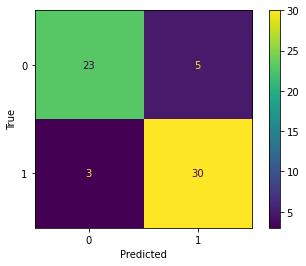

In [7]:
# Test NN 1

y_pred = mlp.predict(X_test)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 86.89%

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50))
0.819672131147541


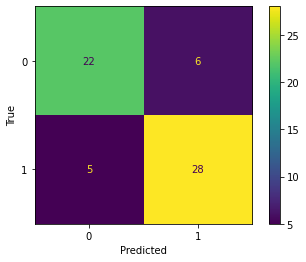

In [11]:
# Optimize Parameter Space

# Supress the many, many warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

parameters = {'hidden_layer_sizes':((50,50), (100,100), (100,100,100,100)), 'activation':('relu','logistic','tanh')} #set parameters for GridSearch
mlp = MLPClassifier() # MLP object
clf = GridSearchCV(mlp, parameters)
clf.fit(X_train, y_train) #Fit GridSearch object
print(clf.best_estimator_) 
y_pred = clf.predict(X_test) #Generate prediction

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 81.89%

0.7868852459016393


,0,1,2,6,7,10,13,16
0,0.562500,1.0,0.339623,0.244275,1.0,0.00,0.0,1.0
1,0.604167,1.0,0.320755,0.458015,1.0,0.75,0.0,1.0
2,0.437500,0.0,0.329181,0.664122,0.0,0.00,0.0,0.0
3,0.520833,1.0,0.150943,0.419847,1.0,0.25,0.0,1.0
4,0.458333,1.0,0.433962,0.389313,1.0,0.75,0.0,1.0


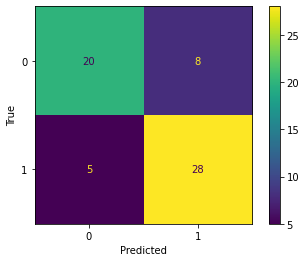

In [12]:
# Feature Selection

mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50)) #create MLP object
selector = SFS(mlp) #create Feature Selector object
selector.fit(X_train,y_train) #run feature selection

#Reduce your training set features selected
X_train_fs = selector.transform(X_train)
X_test_fs = selector.transform(X_test)

#Re-run SVM with selected features
mlp.fit(X_train_fs, y_train)
y_pred = mlp.predict(X_test_fs) 

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 81.89%

# Get selected features
X_train_df = pd.DataFrame(data=X_train)
features = selector.fit_transform(X_train,y_train) 
feature_idx = selector.get_support(indices=True)
feature_names = X_train_df.columns[feature_idx]
features = pd.DataFrame(features, columns=feature_names)
features.head()

# Accuracy: 78.69%

# Overall, this is WORSE than our initial model, so we shall disregard this.

0.819672131147541


,0,1,2,3,10,11,12,15
0,0.562500,1.0,0.339623,0.358447,0.00,0.0,0.0,0.0
1,0.604167,1.0,0.320755,0.205479,0.75,0.0,0.0,0.0
2,0.437500,0.0,0.329181,0.212329,0.00,0.0,1.0,1.0
3,0.520833,1.0,0.150943,0.257991,0.25,0.0,0.0,0.0
4,0.458333,1.0,0.433962,0.392694,0.75,0.0,0.0,0.0


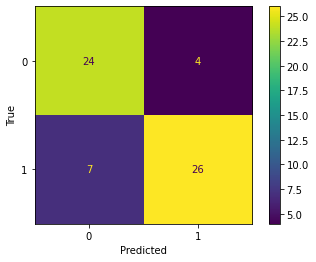

In [13]:
# Feature Selection on Initial Model

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', random_state = 1) #create MLP object
selector = SFS(mlp) #create Feature Selector object
selector.fit(X_train,y_train) #run feature selection

#Reduce your training set features selected
X_train_fs = selector.transform(X_train)
X_test_fs = selector.transform(X_test)

#Re-run SVM with selected features
mlp.fit(X_train_fs, y_train)
y_pred = mlp.predict(X_test_fs) 

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test,y_pred)
print(score) # 81.89%

# Get selected features
X_train_df = pd.DataFrame(data=X_train)
features = selector.fit_transform(X_train,y_train) 
feature_idx = selector.get_support(indices=True)
feature_names = X_train_df.columns[feature_idx]
features = pd.DataFrame(features, columns=feature_names)
features.head()

# Accuracy: 81.97%

# Overall, this is WORSE than our initial model, so we shall disregard this.

In [14]:
# PCA

# Loading the data

df_pca = pd.read_csv('hd_pca.csv')

# Looking at the data

df_pca.head()

,Unnamed: 0,target,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1,1,-2.429920,1.227545,5.318811,-2.126395,-0.544222,0.064007,-0.050474,0.967102,0.506234,0.329697,1.151475,-1.725178,0.292555,-0.309600,-0.290396,0.114007,-0.019986
1,2,1,0.721195,-0.281984,-0.328842,-2.358104,-0.759147,1.779358,0.473326,1.602062,0.986535,-2.173703,0.896514,1.006841,-1.478196,-0.209001,-0.220719,-0.397759,0.025964
2,3,1,2.568912,-0.318636,0.713543,0.530979,1.501292,0.285505,-0.125381,0.812555,-0.040128,-1.344519,-0.797776,0.557769,1.024341,-0.190077,0.858935,1.065946,-0.013232
3,4,1,2.335994,-1.015175,0.566396,0.694903,1.201322,-0.532286,0.810819,-0.179714,0.128637,-0.511888,-0.080877,-0.263581,-1.195391,-0.999259,0.212983,0.129738,0.015585
4,5,1,1.045232,1.367217,-1.124890,0.810735,1.259036,0.410420,0.171669,0.647294,-0.595034,1.743017,1.411727,0.796217,-0.128424,-0.703468,0.155636,-0.290774,-0.001993


In [15]:
df_pca2 = df_pca.drop(["Unnamed: 0"], axis=1)
df_pca2.head()

,target,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1,-2.429920,1.227545,5.318811,-2.126395,-0.544222,0.064007,-0.050474,0.967102,0.506234,0.329697,1.151475,-1.725178,0.292555,-0.309600,-0.290396,0.114007,-0.019986
1,1,0.721195,-0.281984,-0.328842,-2.358104,-0.759147,1.779358,0.473326,1.602062,0.986535,-2.173703,0.896514,1.006841,-1.478196,-0.209001,-0.220719,-0.397759,0.025964
2,1,2.568912,-0.318636,0.713543,0.530979,1.501292,0.285505,-0.125381,0.812555,-0.040128,-1.344519,-0.797776,0.557769,1.024341,-0.190077,0.858935,1.065946,-0.013232
3,1,2.335994,-1.015175,0.566396,0.694903,1.201322,-0.532286,0.810819,-0.179714,0.128637,-0.511888,-0.080877,-0.263581,-1.195391,-0.999259,0.212983,0.129738,0.015585
4,1,1.045232,1.367217,-1.124890,0.810735,1.259036,0.410420,0.171669,0.647294,-0.595034,1.743017,1.411727,0.796217,-0.128424,-0.703468,0.155636,-0.290774,-0.001993


In [16]:
# Train/Test Split

# First 2 PCs
X_pca = df_pca2.iloc[:, 1:18] 
y_pca = df_pca2.iloc[:, 0]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, train_size=0.8, stratify=y_pca, random_state=0)

In [17]:
# Train Sklearn Neural Network 1 (2 layers, 100 units each, relu)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', random_state = 1)
mlp.fit(X_train_pca, y_train_pca)
mlp.score(X_train_pca, y_train_pca) # 82.64%

1.0

0.7868852459016393


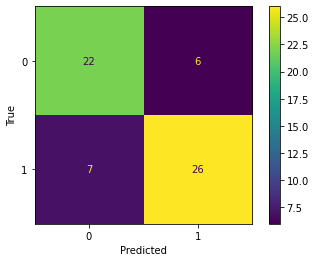

In [18]:
# Test NN 1

y_pred_pca = mlp.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca,y_pred_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred_pca)
print(score) # 78.69%

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50))
0.8360655737704918


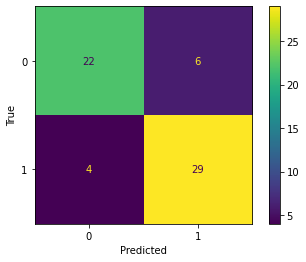

In [19]:
# Optimize Parameter Space

# Supress the many, many warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

parameters = {'hidden_layer_sizes':((50,50), (100,100), (100,100,100,100)), 'activation':('relu','logistic','tanh')} #set parameters for GridSearch
mlp = MLPClassifier() # MLP object
clf = GridSearchCV(mlp, parameters)
clf.fit(X_train_pca, y_train_pca) #Fit GridSearch object
print(clf.best_estimator_) 
y_pred = clf.predict(X_test_pca) #Generate prediction

cf_matrix = confusion_matrix(y_test_pca,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred)
print(score) # 83.61%

0.819672131147541


,PC1,PC2,PC5,PC6,PC11,PC12,PC15,PC17
0,-3.407988,0.174735,0.070839,0.054638,0.195070,-1.686208,-0.197566,-0.049433
1,-3.051089,-0.654573,0.189628,-0.453040,-0.226481,0.923571,-0.377147,0.002726
2,1.489451,0.902967,-0.409508,0.768138,-0.095184,0.085373,-0.081110,-0.015370
3,-2.470847,-1.514092,0.747780,0.269109,0.744796,-0.133654,0.351442,-0.008991
4,-3.647846,-0.357112,0.488850,0.010032,1.299122,1.683977,0.647947,0.019714


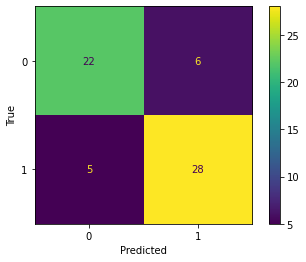

In [20]:
# Feature Selection

mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50)) #create MLP object
selector = SFS(mlp) #create Feature Selector object
selector.fit(X_train_pca,y_train_pca) #run feature selection

#Reduce your training set features selected
X_train_fs = selector.transform(X_train_pca)
X_test_fs = selector.transform(X_test_pca)

#Re-run SVM with selected features
mlp.fit(X_train_fs, y_train_pca)
y_pred = mlp.predict(X_test_fs) 

cf_matrix = confusion_matrix(y_test_pca,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred)
print(score) # 81.89%

# Get selected features
X_train_df = pd.DataFrame(data=X_train_pca)
features = selector.fit_transform(X_train_pca,y_train_pca) 
feature_idx = selector.get_support(indices=True)
feature_names = X_train_df.columns[feature_idx]
features = pd.DataFrame(features, columns=feature_names)
features.head()

# Accuracy: 78.69%

# Overall, this is WORSE than the optimized parameter model, so we shall disregard this.

In [21]:
# Overall, it seems as if GridSearch and SFS do NOT do a good job at assessing the best models
# Therefore, I will begin to manually test models

In [22]:
# Train/Test Split

# First 2 PCs
X_pca = df_pca2.iloc[:, 1:3] 
y_pca = df_pca2.iloc[:, 0]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, train_size=0.8, stratify=y_pca, random_state=0)

0.819672131147541
0.8358208955223881


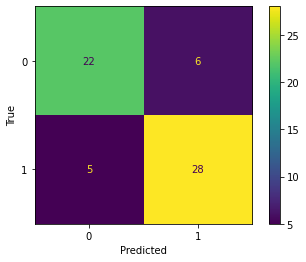

In [25]:
# Train Sklearn Neural Network 1 (2 layers, 100 units each, relu)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', random_state = 1)
mlp.fit(X_train_pca, y_train_pca)

# Test NN 1

y_pred_pca = mlp.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca,y_pred_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred_pca)
f1 = f1_score(y_test_pca,y_pred_pca)
print(score) # 81.97%
print(f1) # 83.58%

0.8524590163934426
0.8615384615384615


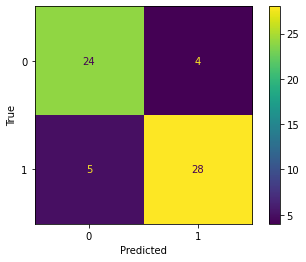

In [26]:
# Train Sklearn Neural Network 2 (2 layers, 100 units each, logistic)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', random_state = 1)
mlp.fit(X_train_pca, y_train_pca)

y_pred_pca = mlp.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca,y_pred_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred_pca)
f1 = f1_score(y_test_pca,y_pred_pca)
print(score) # 85.25%
print(f1) # 86.15%

0.8524590163934426
0.8615384615384615


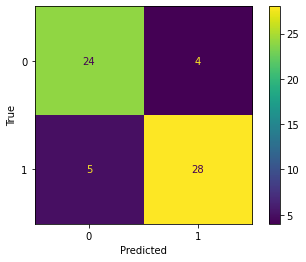

In [27]:
# Train Sklearn Neural Network 3 (2 layers, 100 units each, tanh)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'tanh', random_state = 1)
mlp.fit(X_train_pca, y_train_pca)

y_pred_pca = mlp.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca,y_pred_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred_pca)
f1 = f1_score(y_test_pca,y_pred_pca)
print(score) # 85.25%
print(f1) # 86.15%

0.8524590163934426
0.8615384615384615


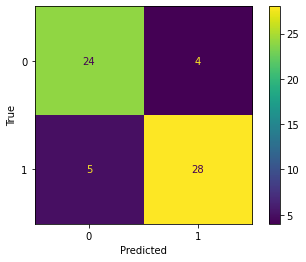

In [28]:
# Train Sklearn Neural Network 4 (2 layers, 50 units each, logistic)

mlp = MLPClassifier(hidden_layer_sizes=(50,50), activation = 'logistic', random_state = 1)
mlp.fit(X_train_pca, y_train_pca)

y_pred_pca = mlp.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca,y_pred_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred_pca)
f1 = f1_score(y_test_pca,y_pred_pca)
print(score) # 85.25%
print(f1) # 86.15%

In [29]:
# Train/Test Split

# PCs 1 and 3
X_pca_1_3 = df_pca2.iloc[:, 1:4]
X_pca_1_3 = X_pca_1_3.drop(["PC2"], axis=1)
y_pca_1_3 = df_pca2.iloc[:, 0]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_1_3, y_pca_1_3, train_size=0.8, stratify=y_pca_1_3, random_state=0)

0.9016393442622951
0.9117647058823529


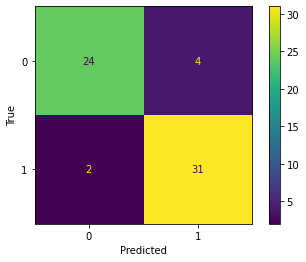

In [30]:
# Train Sklearn Neural Network 1 (2 layers, 100 units each, relu) Winner

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', random_state = 1)
mlp.fit(X_train_pca, y_train_pca)

y_pred_pca = mlp.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca,y_pred_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred_pca)
f1 = f1_score(y_test_pca,y_pred_pca)
print(score) # 90.16%
print(f1) # 91.18%

0.8852459016393442
0.8955223880597014


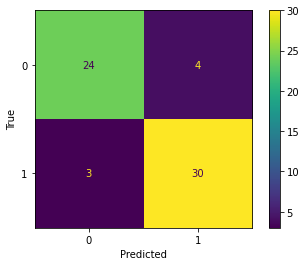

In [31]:
# Train Sklearn Neural Network 2 (2 layers, 100 units each, logistic)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', random_state = 1)
mlp.fit(X_train_pca, y_train_pca)

y_pred_pca = mlp.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca,y_pred_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred_pca)
f1 = f1_score(y_test_pca,y_pred_pca)
print(score) # 88.52%
print(f1) # 89.55%

0.8688524590163934
0.8787878787878788


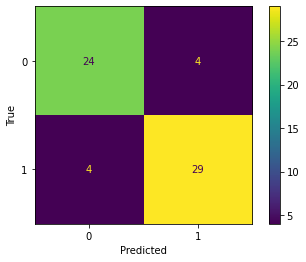

In [32]:
# Train Sklearn Neural Network 2 (2 layers, 100 units each, tanh)

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'tanh', random_state = 1)
mlp.fit(X_train_pca, y_train_pca)

y_pred_pca = mlp.predict(X_test_pca)

cf_matrix = confusion_matrix(y_test_pca,y_pred_pca)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

score = accuracy_score(y_test_pca,y_pred_pca)
f1 = f1_score(y_test_pca,y_pred_pca)
print(score) # 86.89%
print(f1) # 87.88%

In [ ]:
# The Winning Model is:
# mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', random_state = 1)
# Accuracy: 90.16%
# F1: 91.18%